In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv('pair_programming_28nov.csv', index_col = 0)
df_copia = df
df_copia

,country,density,abbreviation,agricultural land,land area,armed forces size,birth rate,calling code,capital/major city,co2-emissions,cpi,cpi change,currency-code,fertility rate,forested area,gasoline price,unnamed 0_y,gdp,gross primary education enrollment,gross tertiary education enrollment,infant mortality,largest city,life expectancy,maternal mortality ratio,minimum wage,official language,out of pocket health expenditure,physicians per thousand,population,population labor force participation,tax revenue,total tax rate,unemployment rate,urban_population,latitud,longitud,continente
unnamed 0_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,0,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,NaN,NaN,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,NaN,NaN,Europa
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,2,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,NaN,NaN,África
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,NaN,NaN,Europa
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,4,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,NaN,NaN,África
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,190,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,NaN,NaN,América del Sur
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,191,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,NaN,NaN,Asia
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,192,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,NaN,NaN,Asia


In [3]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df_copia[df.columns[df_copia.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capital/major city', 'currency-code', 'largest city',
       'official language'],
      dtype='object')


In [4]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df_copia[col].value_counts() / df_copia.shape[0])
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: abbreviation, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJOR CITY


Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: capital/major city, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: currency-code, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna LARGEST CITY


S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: largest city, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna OFFICIAL LANGUAGE


English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: official language, Length: 76, dtype: float64

........................


Para todas las columnas categóricas hemos decidido cambiar los nulos por desconocidos porque no podemos dar datos ficticios. Por ejemplo: Como inventarnos las siglas del país o la moneda, puesto que no siempre coinciden con países que tienen las mismas características. El método utilizado es fillna() y un for.

In [5]:
columna_desconocido = ['abbreviation', 'capital/major city', 'currency-code', 'largest city', 'official language']

In [6]:
for columna in columna_desconocido:
    df_copia[columna] = df_copia[columna].fillna("desconocido")
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df_copia[columna_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation          0
capital/major city    0
currency-code         0
largest city          0
official language     0
dtype: int64

In [7]:
#Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df_copia[df_copia.columns[df_copia.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agricultural land', 'land area', 'armed forces size', 'birth rate',
       'calling code', 'co2-emissions', 'cpi', 'cpi change', 'fertility rate',
       'forested area', 'gasoline price', 'gdp',
       'gross primary education enrollment',
       'gross tertiary education enrollment', 'infant mortality',
       'life expectancy', 'maternal mortality ratio', 'minimum wage',
       'out of pocket health expenditure', 'physicians per thousand',
       'population', 'population labor force participation', 'tax revenue',
       'total tax rate', 'unemployment rate', 'urban_population', 'latitud',
       'longitud'],
      dtype='object')


In [8]:
df_copia[nulos_esta_num].isnull().sum() / df_copia.shape[0]

agricultural land                       0.035897
land area                               0.005128
armed forces size                       0.123077
birth rate                              0.030769
calling code                            0.005128
co2-emissions                           0.035897
cpi                                     0.087179
cpi change                              0.082051
fertility rate                          0.035897
forested area                           0.035897
gasoline price                          0.102564
gdp                                     0.010256
gross primary education enrollment      0.035897
gross tertiary education enrollment     0.061538
infant mortality                        0.030769
life expectancy                         0.041026
maternal mortality ratio                0.071795
minimum wage                            0.230769
out of pocket health expenditure        0.035897
physicians per thousand                 0.035897
population          

In [9]:
df_copia.shape

(195, 37)

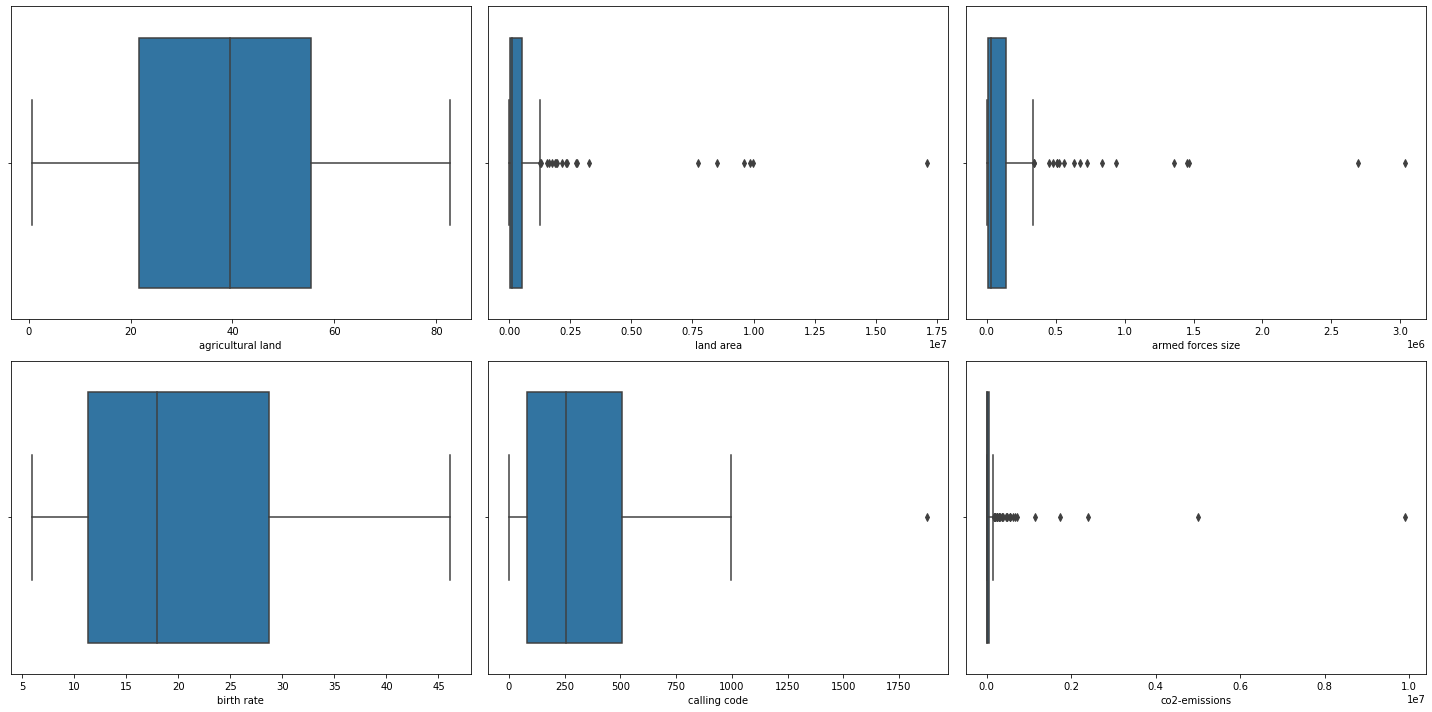

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num[:6]):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
#fig.delaxes(axes[-1])

In [11]:
df_copia['agricultural land'].describe()

count    188.000000
mean      39.117553
std       21.783052
min        0.600000
25%       21.700000
50%       39.600000
75%       55.375000
max       82.600000
Name: agricultural land, dtype: float64

In [12]:
df_copia.describe().T

,count,mean,std,min,25%,50%,75%,max
density,195.0,3.567641e+02,1.982889e+03,2.00,3.550000e+01,8.900000e+01,2.165000e+02,2.633700e+04
agricultural land,188.0,3.911755e+01,2.178305e+01,0.60,2.170000e+01,3.960000e+01,5.537500e+01,8.260000e+01
land area,194.0,6.896244e+05,1.921609e+06,0.00,2.382825e+04,1.195110e+05,5.242560e+05,1.709824e+07
armed forces size,171.0,1.592749e+05,3.806288e+05,0.00,1.100000e+04,3.100000e+04,1.420000e+05,3.031000e+06
birth rate,189.0,2.021497e+01,9.945774e+00,5.90,1.130000e+01,1.795000e+01,2.875000e+01,4.608000e+01
calling code,194.0,3.605464e+02,3.232364e+02,1.00,8.250000e+01,2.555000e+02,5.067500e+02,1.876000e+03
co2-emissions,188.0,1.777992e+05,8.387903e+05,11.00,2.304250e+03,1.230300e+04,6.388425e+04,9.893038e+06
cpi,178.0,1.904610e+02,3.979474e+02,99.03,1.138850e+02,1.253400e+02,1.572650e+02,4.583710e+03
cpi change,179.0,6.722346e+00,2.445041e+01,-4.30,1.000000e+00,2.300000e+00,4.250000e+00,2.549000e+02
fertility rate,188.0,2.698138e+00,1.282267e+00,0.98,1.705000e+00,2.245000e+00,3.597500e+00,6.910000e+00


In [13]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df_copia.isnull().sum() / df_copia.shape[0]) * 100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
agricultural land,3.589744
land area,0.512821
armed forces size,12.307692
birth rate,3.076923
calling code,0.512821
co2-emissions,3.589744
cpi,8.717949
cpi change,8.205128
fertility rate,3.589744
forested area,3.589744


In [26]:
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[['agricultural land', 'land area', 'armed forces size']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado 

array([[5.81000000e+01, 6.52230000e+05, 3.23000000e+05],
       [4.31000000e+01, 2.87480000e+04, 9.00000000e+03],
       [1.74000000e+01, 2.38174100e+06, 3.17000000e+05],
       [4.00000000e+01, 4.68000000e+02, 7.95211317e+04],
       [4.75000000e+01, 1.24670000e+06, 1.17000000e+05],
       [2.05000000e+01, 4.43000000e+02, 0.00000000e+00],
       [5.43000000e+01, 2.78040000e+06, 1.05000000e+05],
       [5.89000000e+01, 2.97430000e+04, 4.90000000e+04],
       [4.82000000e+01, 7.74122000e+06, 5.80000000e+04],
       [3.24000000e+01, 8.38710000e+04, 2.10000000e+04],
       [5.77000000e+01, 8.66000000e+04, 8.20000000e+04],
       [1.40000000e+00, 1.38800000e+04, 1.00000000e+03],
       [1.11000000e+01, 7.65000000e+02, 1.90000000e+04],
       [7.06000000e+01, 1.48460000e+05, 2.21000000e+05],
       [2.33000000e+01, 4.30000000e+02, 1.00000000e+03],
       [4.20000000e+01, 2.07600000e+05, 1.55000000e+05],
       [4.46000000e+01, 3.05280000e+04, 3.20000000e+04],
       [7.00000000e+00, 2.29660

In [29]:
df_copia[['agricultural land_iterative', 'land area_iterative', 'armed forces size_iterative']] = imputer_iterative_imputado 


In [30]:

print(f"Después del 'Iterative' tenemos: \n{df_copia[['agricultural land_iterative', 'land area_iterative', 'armed forces size_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
agricultural land_iterative    0
land area_iterative            0
armed forces size_iterative    0
dtype: int64 nulos


In [31]:
imputer_knn = KNNImputer(n_neighbors = 5)

imputer_knn_imputado = imputer_knn.fit_transform(df_copia[['agricultural land', 'land area', 'armed forces size']])

imputer_knn_imputado

array([[5.81000000e+01, 6.52230000e+05, 3.23000000e+05],
       [4.31000000e+01, 2.87480000e+04, 9.00000000e+03],
       [1.74000000e+01, 2.38174100e+06, 3.17000000e+05],
       [4.00000000e+01, 4.68000000e+02, 1.60000000e+03],
       [4.75000000e+01, 1.24670000e+06, 1.17000000e+05],
       [2.05000000e+01, 4.43000000e+02, 0.00000000e+00],
       [5.43000000e+01, 2.78040000e+06, 1.05000000e+05],
       [5.89000000e+01, 2.97430000e+04, 4.90000000e+04],
       [4.82000000e+01, 7.74122000e+06, 5.80000000e+04],
       [3.24000000e+01, 8.38710000e+04, 2.10000000e+04],
       [5.77000000e+01, 8.66000000e+04, 8.20000000e+04],
       [1.40000000e+00, 1.38800000e+04, 1.00000000e+03],
       [1.11000000e+01, 7.65000000e+02, 1.90000000e+04],
       [7.06000000e+01, 1.48460000e+05, 2.21000000e+05],
       [2.33000000e+01, 4.30000000e+02, 1.00000000e+03],
       [4.20000000e+01, 2.07600000e+05, 1.55000000e+05],
       [4.46000000e+01, 3.05280000e+04, 3.20000000e+04],
       [7.00000000e+00, 2.29660

In [33]:
df_copia[['agricultural land_knn', 'land area_knn', 'armed forces size_knn']] = imputer_knn_imputado

In [34]:
print(f"Después del 'KNN' tenemos: \n{df_copia[['agricultural land_knn', 'land area_knn', 'armed forces size_knn']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
agricultural land_knn    0
land area_knn            0
armed forces size_knn    0
dtype: int64 nulos


In [39]:
df_copia.describe()[["agricultural land","agricultural land_iterative", "agricultural land_knn", "land area", "land area_iterative", "land area_knn", "armed forces size", "armed forces size_iterative", "armed forces size_knn"]]

,agricultural land,agricultural land_iterative,agricultural land_knn,land area,land area_iterative,land area_knn,armed forces size,armed forces size_iterative,armed forces size_knn
count,188.000000,195.000000,195.000000,1.940000e+02,1.950000e+02,1.950000e+02,1.710000e+02,1.950000e+02,1.950000e+02
mean,39.117553,39.125049,39.205423,6.896244e+05,6.896244e+05,6.896244e+05,1.592749e+05,1.498640e+05,1.416773e+05
std,21.783052,21.386490,21.492310,1.921609e+06,1.916650e+06,1.916650e+06,3.806288e+05,3.572307e+05,3.595789e+05
min,0.600000,0.600000,0.600000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,21.700000,22.650000,22.360000,2.382825e+04,2.445650e+04,2.445650e+04,1.100000e+04,1.250000e+04,9.000000e+03
50%,39.600000,39.369842,39.300000,1.195110e+05,1.205380e+05,1.205380e+05,3.100000e+04,4.200000e+04,2.400000e+04
75%,55.375000,54.850000,55.050000,5.242560e+05,5.541675e+05,5.541675e+05,1.420000e+05,1.250000e+05,1.250000e+05
max,82.600000,82.600000,82.600000,1.709824e+07,1.709824e+07,1.709824e+07,3.031000e+06,3.031000e+06,3.031000e+06


Analizamos los resultados: 
Agricultural land, land area, armed forces size: nos fijamos que ni la media ni la mediana son muy diferentes entre la columna original, la imputada con el Iterative y la imputada con el KNN, por lo tanto cualquiera de los dos métodos serían correctos para imputar los nulos. Además, nos quedamos con la media.
 

In [40]:
df_copia.drop(["agricultural land","agricultural land_knn", "land area","land area_knn", "armed forces size",  "armed forces size_knn"], axis = 1, inplace = True)
nuevo_nombre = {"agricultural land_iterative": "agriculture_land",  'land area_iterative': "land_area", "armed forces size_iterative": "armed_forces_size"}
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [42]:
df_copia

,country,density,abbreviation,birth rate,calling code,capital/major city,co2-emissions,cpi,cpi change,currency-code,fertility rate,forested area,gasoline price,unnamed 0_y,gdp,gross primary education enrollment,gross tertiary education enrollment,infant mortality,largest city,life expectancy,maternal mortality ratio,minimum wage,official language,out of pocket health expenditure,physicians per thousand,population,population labor force participation,tax revenue,total tax rate,unemployment rate,urban_population,latitud,longitud,continente,agriculture_land,land_area,armed_forces_size
unnamed 0_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Afghanistan,60.0,AF,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,0,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,NaN,NaN,Asia,58.1,652230.0,323000.000000
1,Albania,105.0,AL,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,NaN,NaN,Europa,43.1,28748.0,9000.000000
2,Algeria,18.0,DZ,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,2,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,NaN,NaN,África,17.4,2381741.0,317000.000000
3,Andorra,164.0,AD,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,NaN,NaN,Europa,40.0,468.0,79521.131723
4,Angola,26.0,AO,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,4,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,NaN,NaN,África,47.5,1246700.0,117000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,190,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,NaN,NaN,América del Sur,24.5,912050.0,343000.000000
191,Vietnam,314.0,VN,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,191,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,NaN,NaN,Asia,39.3,331210.0,522000.000000
192,Yemen,56.0,YE,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,192,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,NaN,NaN,Asia,44.6,527968.0,40000.000000
